Name:  **Sanna Madan**  
UID:  **114763105**

# Homework 1:  Linear Algebra 
### Due Feb 9, 2021

## Problem 1:  Dual norm

Given some norm $\|\cdot\|,$ it's dual norm $\|\cdot\|_*$ is defined as
$$\|x\|_*  = \max_{\|z\|\le 1} z^Tx.$$
Prove the dual norm is indeed a norm.


### Solution
####  Homogeneity 

$\|\alpha x\|_*  = \max_{\|z\|\le 1} z^T\alpha x$ = $ |\alpha| \max_{\|z\|\le 1} z^T x $ = $ |\alpha| \|x\|_*,$ for all $ x\in\mathbb{R^N} $ and $ \alpha\in\mathbb{R}. $

#### Sub-additivity 
$\|x + y\|_* = \max_{\|z\|\le 1} z^T(x+y) = \max_{\|z\|\le 1} z^T(x) + \max_{\|z\|\le 1} z^T(y) = \|x\|_* + \|y\|_* $

$ \le \|x\|_* + \|y\|_*. $

#### Separability: 
$ \|0\|_* =  \max_{\|z\|\le 1} z^T(0) = 0. $

Otherwise $ \|x\|_* \ne 0 $ for $ x \ne 0. $ There always exists a $ \|z\|\le 1 $ such that $ \max_{\|z\|\le 1} z^T(x) \ne 0. $

## Problem 2
Consider two discrete sequences $f=(f_0,f_1,f_2,\ldots, f_N),\, g=(g_0,g_1,g_2,\ldots, g_N).$  The sequences have period $N$, meaning that $f[s+N] = f[s-N]= f[s]$ for all $s\in\mathbb{Z}.$  We can combine these two functions into a new function by multiplying ($\cdot$), filtering ($\square$), or convolving ($*$).

We can define the new functions produced by these operations coordinate-wise.  The three functions we are interested in are... 

**Coordinate-wise multiply:**  $(f\cdot g)[s] = f[s]g[s].$

**Linear Filter**:  $(f\square g)[s] =  \sum_{t=0}^{N-1} f(s+t)g(t)$

**Convolution**:  $(f*g)[s] =  \sum_{t=0}^{N-1} f(s-t)g(t)=  \sum_{t=0}^{N-1} f(s+t)g(-t)$

Note that convolving $f(\cdot)$ with $g(\cdot)$ is the same as filtering $f(\cdot)$ with the "flipped" function $g(- \cdot).$

Given an $N$-periodic function $f$, it's discrete Fourier transform $\hat f$ is defined by 
  $$\hat f [u] = \sum_{s=0}^{N-1} \omega^{us} f[s].$$

**Prove the Convolution Theorem:**  The Fourier transform of $f*g$ is the coordinate-wise product of $\hat f$ and $\hat g.$  In other words
  $$\widehat{f*g} = \hat f \cdot \hat g.$$


### Proof

$ (f*g)[s] = \sum_{t=0}^{N-1} f(s-t)g(t) $

$\widehat{f*g}[u] = \sum_{s=0}^{N-1} \omega^{us} * [\sum_{t=0}^{N-1} f[s-t]g[t]] $

Let $ d = n - s. $

$ = \sum_{t=0}^{N-1} g[t] * \sum_{d=-s}^{N-1-s} f[d] \omega^{u(s+d)} $

$ = \sum_{t=0}^{N-1} g[t] \omega^{us} * \sum_{d=0}^{N-1} f[d] \omega^{ud} $

$ = \hat f \cdot \hat g. $

Therefore $ \widehat{f*g} = \hat f \cdot \hat g. $

## Problem 3:  Fourier matrix
The discrete Fourier transform of a signal is a linear operator that can be performed very quickly using the fast Fourier transform (FFT).  Because it's a linear operator, we can represent the discrete Fourier transform as a matrix. 
An $N\times N$ Fourier matrix has entries
   $$F_N[r,c] = \frac{\omega^{rc}}{\sqrt{N}}, \text{ for } 0\le r,c \le N-1.$$
where $\omega_{N} = \exp\left(\frac{-2\pi i}{N}\right)$ is the Nth root of unity.  This number has the property that $\omega_N^0 = \omega_N^N = 1,$ and $|\omega_N|=1.$  A Fourier matrix is Hermitian symmetric ($F_N^H=F_N$), orthogonal ($F^H_NF_N=I_N$), and looks kinda like this...

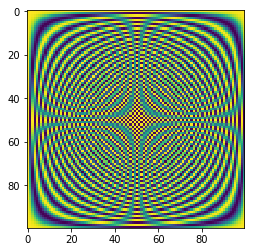

In [2]:
import numpy as np
from matplotlib import pyplot as plt
F = np.fft.fft(np.eye(100))  # Create a matrix representation by invoking the FFT on the identity.
plt.imshow(np.real(F));

The simplest version of the fast Fourier transform computes the DFT quickly using the Cooley-Tukey factorization
 $$F_N x = \frac{1}{\sqrt{2}}\left(\begin{array}{cc} I & D \\ I & -D \end{array}\right)  \left(\begin{array}{c}  F_{N/2}x_e \\   F_{N/2}x_o \end{array}\right)
$$
 where $D_{kk} = exp(-2\pi i k/N)$ is a diagonal matrix of "twiddle factors," $x_e=(x_0,x_2,x_4,\cdots)$ contains even-indexed components of $x$, and $x_o$ contains the odd-indexed components.  If $N$ is a power of 2, then this reduction formula enables us to compute the product $F_N x$ in $O(N\log N)$ time, which is MUCH faster than the naive matrix multiplication algorithm, which is $O(N^2).$ 
 
**Prove the Cooley-Tukey factorization formula.**
 
 Hint:  Use this simpler/algebraic statement of the theorem:
   $$\hat x[s] = \frac{1}{\sqrt{2}} \big(\hat x_e[s]+ \exp(-2\pi i s/N) \hat x_o[s] \big). $$
 Here, the sequences $\hat x_e$ and $\hat x_o[s]$ are interpreted to be symmetric, i.e., $\hat x_e[i+N/2] = \hat x_e[n].$

### Proof

$ \hat x[s] = \frac{1}{\sqrt{N}} \sum_{n=0}^{N-1}x[n] \omega^{sn}_N $

$ = \frac{1}{\sqrt{N}} \sum_{n=0}^{N/2-1}x[2n] \omega^{s(2n)}_N + \frac{1}{\sqrt{N}} \sum_{n=0}^{N/2-1}x[2n+1] \omega^{s(2n+1)}_N $

$ = \frac{1}{\sqrt{N}} \sum_{n=0}^{N/2-1}x[2n] \omega^{s(2n)}_N + \frac{1}{\sqrt{N}} \omega^{s} \sum_{n=0}^{N/2-1}x[2n+1] \omega^{s(2n)}_N $

$ = \frac{1}{\sqrt{2}} * \big( \frac{1}{\sqrt{N/2} \sum_{n=0}^{\frac{N}{2}-1} x[2n] \omega^{sn}_{N/2} + \omega^{s} * [\frac{1}{\sqrt{N/2} \sum_{n=0}^{\frac{N}{2}-1} x[2n+1] * \omega^{sn}_{N/2} ) $

Therefore, $ \hat x[s] = \frac{1}{\sqrt{2}} \big(\hat x_e[s]+ \exp(-2\pi i s/N) \hat x_o[s] \big). $

## Problem 4
Consider the measurement model
  $$y = Dx + \eta$$
  where $D\in m\times n$ is a measurement matrix, and $\eta\in \mathbb{R}^N$ is a noise vector drawn from a Gaussian distribution with covariance matrix $\Sigma.$ The density function for this distribution is
  $$ \eta \sim \frac{1}{\sqrt{(2\pi)^m|\Sigma|}}\exp(- \frac{1}{2}\eta^T \Sigma^{-1}\eta) $$
   where $|\Sigma|$ denotes the determinant of $\Sigma.$  Suppose we have prior knowledge that every entry in $x$ is draw from an i.i.d. Laplace distribution 
  $$x_i \sim \frac{1}{2b}\exp(-|x_i|/b).$$
  
  Derive the negative log-likelihood function for $x$ given (fixed) measurements $y$.  Write the complete NLL without throwing away any constants (although you may use Bayes' rule, which implicitly throws away a normalization constant).   
   
 

### Solution
*Put your work here*

$$p(y|x) = \frac{1}{\sqrt{(2\pi)^m|\Sigma|}}\exp\left( -\frac{1}{2}(y-Ax)^T \Sigma^{-1}(y-Ax)\right)$$
   $$p(x) = \prod_i  \frac{1}{2b}exp(-|x_i|/b) = \frac{1}{(2b)^n}\exp(-\|x\|_1/b). $$
   Using Bayes' rule,
   $$p(x|y) \sim p(y|x)p(x)   =  \frac{1}{\sqrt{(2\pi)^m|\Sigma|}}\exp\left(- \frac{1}{2}(y-Ax)^T \Sigma^{-1}(y-Ax)\right)\frac{1}{(2b)^n}\exp(-\|x\|_1/b).$$
The LL is just the log of this thing, which is
 $$\frac{-m}{2}\log(2\pi)+\frac{-1}{2} \log|\Sigma| +  \frac{-1}{2}(y-Ax)^T \Sigma^{-1}(y-Ax) - n\log(2b)  + \frac{-1}{b}\|x\|_1.$$
 We can now easily multiple by $-1$ and re-arrange to get the NLL
  $$\frac{1}{b}\|x\|_1  + \frac{1}{2}(y-Ax)^T \Sigma^{-1}(y-Ax)  +  \frac{1}{2}(m\log(2\pi)+\log|\Sigma|)  + n\log(2b)  .$$
  

 NOW, throw away all constants that don't affect the solution, and write a minimization problem for finding the maximum a posteriori (MAP) estimator  (this final answer should look quite simple).   

### Solution
*Put your work here*
     $$\text{minimize}  \quad \frac{1}{b}\|x\|_1  + \frac{1}{2}(y-Ax)^T \Sigma^{-1}(y-Ax)  .$$
